# Utilizzo del KNN per la classificazione sul dataset Iris

In questo notebook, esploreremo l'implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione utilizzando Python. Dopo aver effettuato l'analisi esplorativa, possiamo implementare un modello di classificazione KNN in Python.

## Descrizione del Problema

Il problema di classificazione consiste nel prevedere la specie di un'iris (cioè a quale delle tre specie appartiene) utilizzando un insieme di misurazioni delle caratteristiche fisiche dei fiori. Il dataset contiene 150 campioni di fiori, suddivisi equamente tra le tre specie di Iris:

1. **Iris-setosa**
2. **Iris-versicolor**
3. **Iris-virginica**

![iris-flower](Images/iris-flower.png)

## Caratteristiche del Dataset

Il dataset contiene quattro caratteristiche (features) misurate per ciascun fiore:

1. **Lunghezza del sepalo** (sepal length) in centimetri.
2. **Larghezza del sepalo** (sepal width) in centimetri.
3. **Lunghezza del petalo** (petal length) in centimetri.
4. **Larghezza del petalo** (petal width) in centimetri.

E la classe (target) che indica la specie dell'iris, che ha valori: 0, 1 o 2. Quindi

- **Iris-setosa**: 0
- **Iris-versicolor**: 1
- **Iris-virginica**: 2

## Obiettivo

L'obiettivo del problema è costruire un modello di classificazione che, dato un nuovo campione con le misurazioni delle quattro caratteristiche sopra elencate, sia in grado di predire correttamente la specie dell'iris.

## Implementazione di KNN in Python

### 1. Caricamento dei dati
Prima di tutto, caricheremo un dataset. In questo esempio, utilizzeremo il famoso dataset Iris fornito dalla libreria `sklearn`. Visualizzeremo anche i dati in un DataFrame per una migliore comprensione.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Creazione di un DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = pd.Series(y).apply(lambda x: iris.target_names[x])

# Visualizzazione delle prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Definizione delle metriche di distanza

In questa sezione, definiteremo le funzioni che modellano le metriche di distanza che verranno utilizzate per calcolare la distanza tra due campioni. In questo esempio, utilizzeremo le seguenti metriche:

- Euclidea
  $$ d(\mathbf{x}, \mathbf{z}) = \sqrt{\sum_{j=1}^d (x_j - z_j)^2} $$
- Manhattan
  $$ d(\mathbf{x}, \mathbf{z}) = \sum_{j=1}^d |x_j - z_j| $$
- Čebyšëv
  $$ d(\mathbf{x}, \mathbf{z}) = \max_{j=1}^d |x_j - z_j| $$

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b))

### 3. Implementazione del KNN

In [3]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean', task='classification'):
        self.k = k
        self.distance_metric = distance_metric
        self.task = task

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Calcolare la distanza tra x e tutti i campioni nel set di addestramento
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'chebyshev':
            distances = [chebyshev_distance(x, x_train) for x_train in self.X_train]
        
        # Ordinare le distanze e ottenere i primi k indici
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        if self.task == 'classification':
            # Per la classificazione, restituire la classe più comune tra i vicini
            most_common = np.bincount(k_nearest_labels).argmax()
            return most_common
        elif self.task == 'regression':
            # Per la regressione, restituire la media dei valori dei vicini
            return np.mean(k_nearest_labels)


In [4]:
# Caricare il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Suddividere il dataset in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


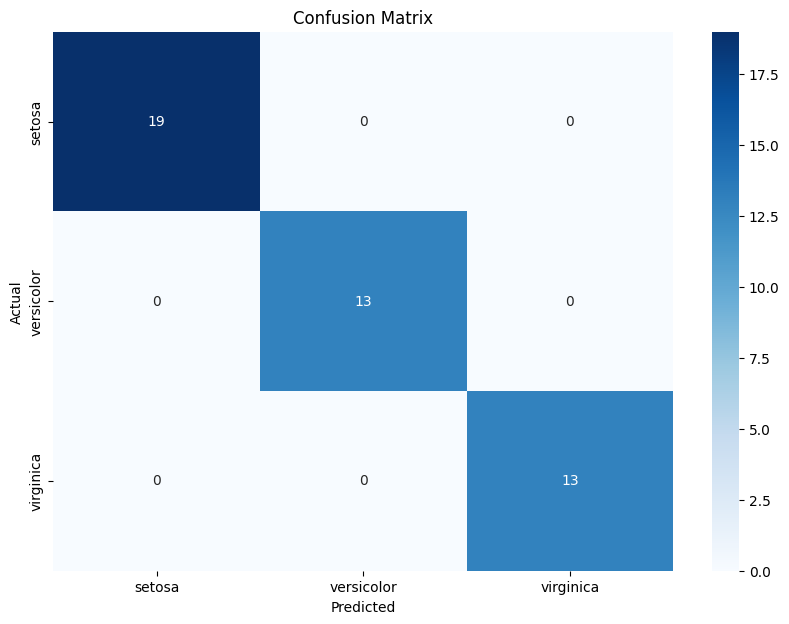

In [5]:
# Inizializzare e addestrare il modello KNN
knn_classifier = KNN(k=3, distance_metric='euclidean', task='classification')
knn_classifier.fit(X_train, y_train)

# Fare previsioni
y_pred = knn_classifier.predict(X_test)

# Valutare il modello
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Importiamo le librerie necessarie
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Caricare il dataset California Housing
boston = fetch_california_housing()
X = boston.data
y = boston.target

# Suddividere il dataset in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizzare le caratteristiche (è importante per KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Utilizzare la classe KNN definita precedentemente per la regressione
knn_regressor = KNN(k=3, distance_metric='euclidean', task='regression')
knn_regressor.fit(X_train, y_train)

# Fare previsioni
y_pred = knn_regressor.predict(X_test)

# Valutare il modello
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualizzare i risultati
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, linewidth=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Reale vs Predetto')
plt.show()

KeyboardInterrupt: 